In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("BikeData.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.shape

(731, 16)

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df1 = df.drop(['dteday','instant','casual','registered'],axis = 'columns')
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


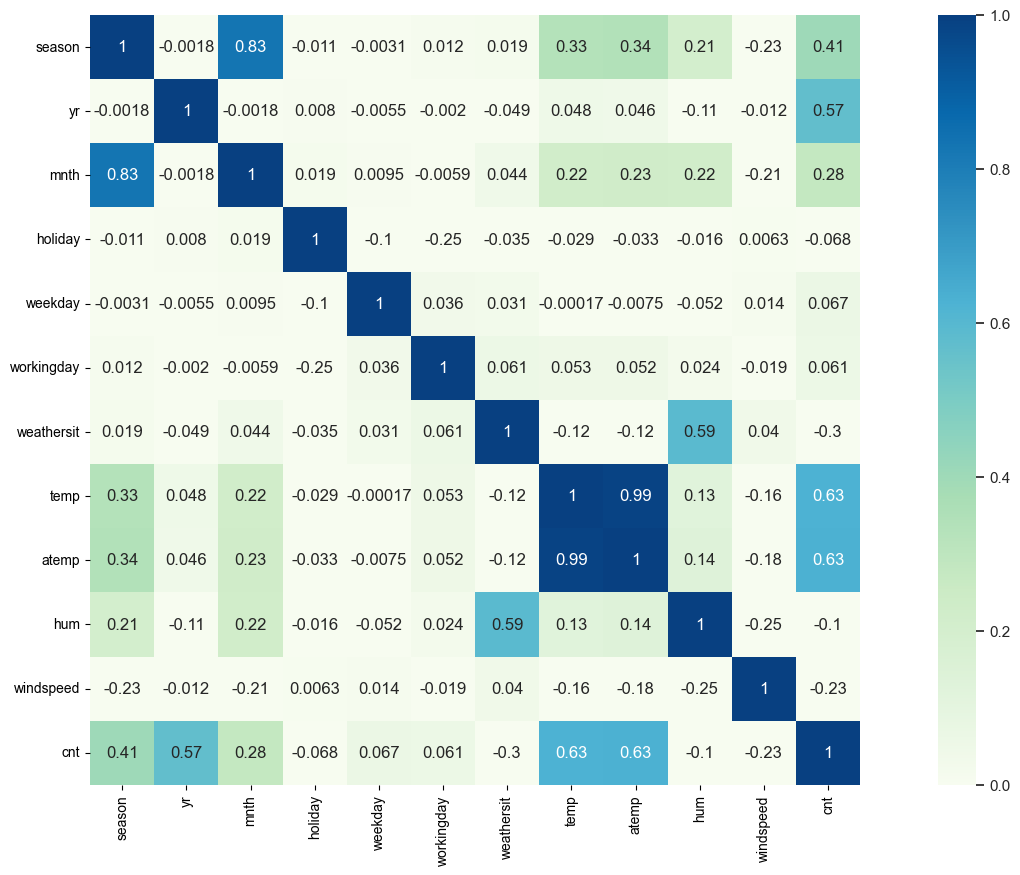

In [7]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1)
sns.heatmap(df1.corr(),vmax=1.0, vmin=0.0, square=True,annot=True, cmap="GnBu")
plt.show()

In [8]:
df2 = df1.drop(['temp'],axis = 'columns')
df2.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600
5,1,0,1,0,4,1,1,0.233209,0.518261,0.089565,1606
6,1,0,1,0,5,1,2,0.208839,0.498696,0.168726,1510
7,1,0,1,0,6,0,2,0.162254,0.535833,0.266804,959
8,1,0,1,0,0,0,1,0.116175,0.434167,0.361950,822
9,1,0,1,0,1,1,1,0.150888,0.482917,0.223267,1321


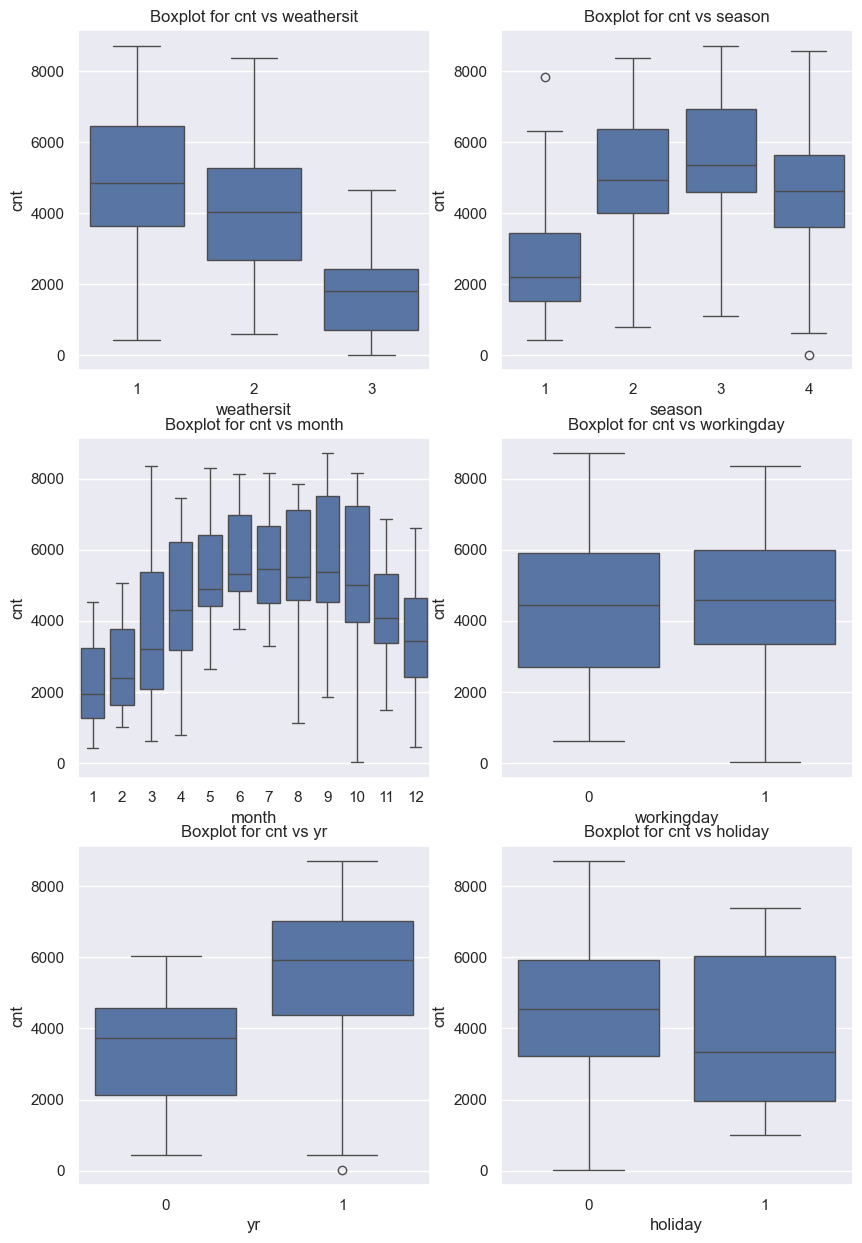

In [9]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,15)
sns.boxplot(data=df2,y="cnt",x="season",orient='v',ax=axes[0][1])
sns.boxplot(data=df2,y="cnt",x="mnth",orient="v",ax=axes[1][0])
sns.boxplot(data=df2,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=df2,y="cnt",x="weathersit",orient='v',ax=axes[0][0])
sns.boxplot(data=df2,y="cnt",x="yr",orient="v",ax=axes[2][0])
sns.boxplot(data=df2,y="cnt",x="holiday",orient="v",ax=axes[2][1])

axes[0][0].set(xlabel="weathersit",ylabel='cnt',title = "Boxplot for cnt vs weathersit")
axes[0][1].set(xlabel="season",ylabel="cnt",title="Boxplot for cnt vs season")
axes[1][0].set(xlabel="month", ylabel="cnt",title="Boxplot for cnt vs month")
axes[1][1].set(xlabel="workingday",ylabel="cnt",title="Boxplot for cnt vs workingday")
axes[2][0].set(xlabel="yr",ylabel="cnt",title="Boxplot for cnt vs yr")
axes[2][1].set(xlabel="holiday",ylabel="cnt",title="Boxplot for cnt vs holiday")
plt.show()

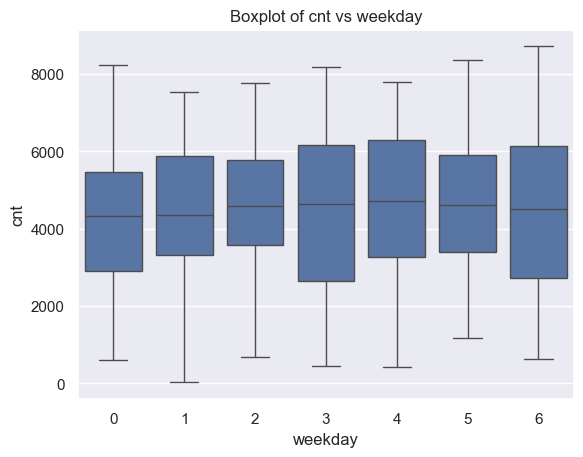

In [10]:
fig.set_size_inches(8,12)
sns.boxplot(data=df2, x="weekday",y="cnt").set_title("Boxplot of cnt vs weekday")
plt.show()

In [11]:
def calc_z_score(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data-mean)/std_dev
    return z_scores

In [12]:
z = calc_z_score(df2['season'])
threshold_z = 3
 
outlier_indices = np.where(abs(z) > threshold_z)[0]
df3 = df2.drop(outlier_indices)
print("Original DataFrame Shape:", df2.shape)
print("DataFrame Shape after Removing Outliers:", df3.shape)

Original DataFrame Shape: (731, 11)
DataFrame Shape after Removing Outliers: (731, 11)


In [13]:
z = calc_z_score(df3['hum'])
threshold_z = 3
 
outlier_indices = np.where(abs(z) > threshold_z)[0]
df4 = df3.drop(outlier_indices)
print("Original DataFrame Shape:", df2.shape)
print("DataFrame Shape after Removing Outliers:", df4.shape)

Original DataFrame Shape: (731, 11)
DataFrame Shape after Removing Outliers: (729, 11)


In [14]:
z = calc_z_score(df4['windspeed'])
threshold_z = 3
 
outlier_indices = np.where(abs(z) > threshold_z)[0]
df5 = df4.drop(outlier_indices)
print("Original DataFrame Shape:", df2.shape)
print("DataFrame Shape after Removing Outliers:", df5.shape)

Original DataFrame Shape: (731, 11)
DataFrame Shape after Removing Outliers: (726, 11)


In [15]:
z = calc_z_score(df5['atemp'])
threshold_z = 3
 
outlier_indices = np.where(abs(z) > threshold_z)[0]
df6 = df5.drop(outlier_indices)
print("Original DataFrame Shape:", df2.shape)
print("DataFrame Shape after Removing Outliers:", df6.shape)

Original DataFrame Shape: (731, 11)
DataFrame Shape after Removing Outliers: (726, 11)


In [16]:
z = calc_z_score(df6['yr'])
threshold_z = 3
 
outlier_indices = np.where(abs(z) > threshold_z)[0]
df7 = df6.drop(outlier_indices)
print("Original DataFrame Shape:", df2.shape)
print("DataFrame Shape after Removing Outliers:", df7.shape)

Original DataFrame Shape: (731, 11)
DataFrame Shape after Removing Outliers: (726, 11)


In [17]:
X = df7.drop(['cnt'],axis = 'columns')
Y = df7['cnt'].squeeze()

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [19]:
X_train_normalized.shape

(508, 10)

In [20]:
np.random.seed(12)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2', None], 
}
rf = RandomForestRegressor()

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5,n_iter = 10)

random_search.fit(X_train_normalized, Y_train)

print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'max_features': None, 'max_depth': 8}


In [21]:
rf.set_params( max_features = None,
               max_depth = 8,
               n_estimators = 200,
                )

RandomForestRegressor(max_depth=8, max_features=None, n_estimators=200)

In [22]:
rf.fit(X_train_normalized, Y_train)
rfPredictions = rf.predict(X_test_normalized)
rmse_rf = np.sqrt(mean_squared_error(Y_test, rfPredictions))
r2 = r2_score(Y_test, rfPredictions)
print("RMSE for test set in random forest regressor  is :" , rmse_rf)
print("R2 Score for test set in random forest regressor  is :" , r2)

RMSE for test set in random forest regressor  is : 721.2926567051967
R2 Score for test set in random forest regressor  is : 0.856275927129122
